In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn, sklearn, numpy as np, random as rnd

In [2]:
train_set=pd.read_csv('train.csv')

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_set.drop(['Ticket', 'Fare','Cabin','Embarked', 'PassengerId', 'Name'], inplace=True, axis=1)

In [6]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
X_train_set, y_train_set=train_set[['Pclass','Sex','Age','SibSp','Parch']], train_set['Survived']

In [8]:
X_train_set.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [9]:
y_train_set.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
X_train_set['Sex']=X_train_set['Sex'].replace(to_replace=['female','male'], value=[1,0])
X_train_set.head()

C:\Users\gost_\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [11]:
X_train_set['Age'].max()

80.0

In [12]:
X_train_set['Age'].min()

0.41999999999999998

In [13]:
mu=X_train_set['Age'].mean()
sigma=np.sqrt(X_train_set['Age'].var())
print mu, sigma

29.6991176471 14.5264973323


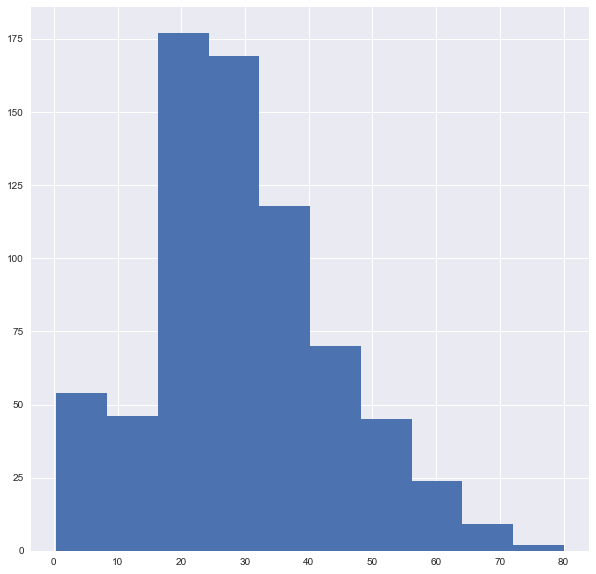

In [14]:
%matplotlib inline
train_set['Age'].hist(figsize=(10,10))

In [15]:
rnd_norm=[]
while len(rnd_norm)!=177:
    x=rnd.normalvariate(mu,sigma)
    if x<=0.:
        continue
    rnd_norm.append(x)

In [69]:
k=0
for idx, el in enumerate(X_train_set['Age']):
    if np.isnan(el):
        X_train_set['Age'][idx]=rnd_norm[k]
        k+=1
    print idx, el

0 22.0
1 38.0
2 26.0
3 35.0
4 35.0
5 16.0146102536
6 54.0
7 2.0
8 27.0
9 14.0
10 4.0
11 58.0
12 20.0
13 39.0
14 14.0
15 55.0
16 2.0
17 39.3849050612
18 31.0
19 47.0778286805
20 35.0
21 34.0
22 15.0
23 28.0
24 8.0
25 38.0
26 26.7639456045
27 19.0
28 34.3028451816
29 9.96303067112
30 40.0
31 30.2749677769
32 25.150030984
33 66.0
34 28.0
35 42.0
36 31.4260340136
37 21.0
38 18.0
39 14.0
40 40.0
41 27.0
42 51.4975519912
43 3.0
44 19.0
45 29.1074645221
46 24.2545635826
47 28.6808989707
48 32.0820158712
49 18.0
50 7.0
51 21.0
52 49.0
53 29.0
54 65.0
55 14.1289562926
56 21.0
57 28.5
58 5.0
59 11.0
60 22.0
61 38.0
62 45.0
63 4.0
64 22.6359752631
65 25.3126984457
66 29.0
67 19.0
68 17.0
69 26.0
70 32.0
71 16.0
72 21.0
73 26.0
74 32.0
75 25.0
76 42.9476622584
77 11.8325184161
78 0.83
79 30.0
80 22.0
81 29.0
82 31.9320181174
83 28.0
84 17.0
85 33.0
86 16.0
87 20.2483460596
88 23.0
89 24.0
90 29.0
91 20.0
92 46.0
93 26.0
94 59.0
95 9.86433912833
96 71.0
97 23.0
98 34.0
99 34.0
100 28.0
101 26.14506

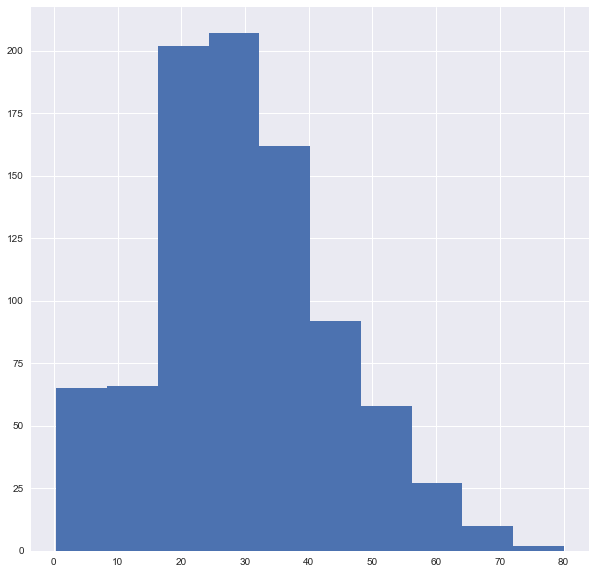

In [70]:
%matplotlib inline
X_train_set['Age'].hist(figsize=(10,10))

In [71]:
pd.crosstab(train_set['Sex'], train_set['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [72]:
test_set=pd.read_csv('test.csv')
test_set.drop(['Ticket', 'Fare','Cabin','Embarked', 'PassengerId', 'Name'], inplace=True, axis=1)
X_test_set=test_set[['Pclass','Sex','Age','SibSp','Parch']]
X_test_set['Sex']=X_test_set['Sex'].replace(to_replace=['female','male'], value=[1,0])

y_test_set=pd.read_csv('gender_submission.csv')
y_test_set.drop(['PassengerId'], axis=1, inplace=True)
X_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


In [73]:
norm=[]
while len(norm)!=86:
    x=rnd.normalvariate(mu,sigma)
    if x<=0.:
        continue
    norm.append(x)

In [74]:
k=0
for idx, el in enumerate(X_test_set['Age']):
    if np.isnan(el):
        X_test_set['Age'][idx]=norm[k]
        k+=1

C:\Users\gost_\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


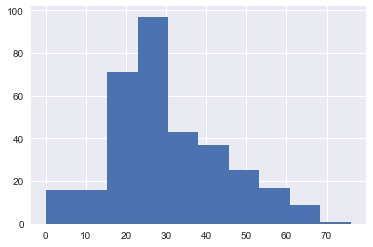

In [75]:
%matplotlib inline
test_set['Age'].hist()

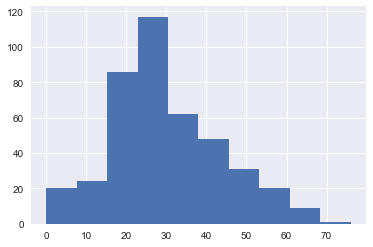

In [76]:
%matplotlib inline
X_test_set['Age'].hist()

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

In [78]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_set, y_train_set)
auc_zeros=roc_auc_score(y_test_set, lin_reg.predict(X_test_set))
print auc_zeros

0.995523347843


In [86]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_set, y_train_set)
pred = lin_reg.predict(X_test_set)
err=0
for i, j in zip(y_test_set, pred):
    if i!=j:
        err+=1
err=err/len(pred)
err

0